In [1]:
!pip install tensorflow opencv-python mediapipe sklearn matplotlib

Traceback (most recent call last):
  File "/Users/pranjalchoudhury/opt/anaconda3/bin/pip", line 11, in <module>
    sys.exit(main())
  File "/Users/pranjalchoudhury/opt/anaconda3/lib/python3.9/site-packages/pip/_internal/cli/main.py", line 68, in main
    command = create_command(cmd_name, isolated=("--isolated" in cmd_args))
  File "/Users/pranjalchoudhury/opt/anaconda3/lib/python3.9/site-packages/pip/_internal/commands/__init__.py", line 94, in create_command
    module = importlib.import_module(module_path)
  File "/Users/pranjalchoudhury/opt/anaconda3/lib/python3.9/importlib/__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1030, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1007, in _find_and_load
  File "<frozen importlib._bootstrap>", line 986, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 680, in _load_unlocked
  File "<frozen importlib._bo

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import mediapipe as mp

In [3]:
mp_holistic= mp.solutions.holistic #holistic model
mp_drawing=mp.solutions.drawing_utils #Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Color Conversion
    image.flags.writeable= False
    results= model.process(image)
    image= cv2.cvtColor(image, cv2.COLOR_RGB2BGR)#Color Conversion
    return image , results

In [5]:
def draw_landmarks(image, results):
    
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    

In [6]:
def draw_styled_landmarks(image, results):
    
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80,110,10),thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121),thickness=1, circle_radius=1)
                             )
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10),thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121),thickness=2, circle_radius=2)
                             )
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76),thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250),thickness=2, circle_radius=2)
                             )
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66),thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230),thickness=2, circle_radius=2)
                             )
    

In [7]:
cap=cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        
        #Read feed
        ret, frame= cap.read()
        cv2.imshow('OpenCV Feed', frame)
        
        
        #make decisions
        image , results= mediapipe_detection(frame,holistic)
        print(results)
        
        #Draw landmarks
        draw_styled_landmarks(image, results)
            
        #show to screen
        cv2.imshow('OpenCV Feed', image)
        
        #Breaking gracefully
        if cv2.waitKey(10)& 0xFF==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

In [10]:
draw_landmarks(frame, results)

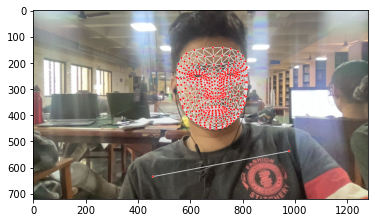

In [11]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [12]:
results.pose_landmarks

landmark {
  x: 0.5335073471069336
  y: 0.43270179629325867
  z: -0.6967540979385376
  visibility: 0.9999237060546875
}
landmark {
  x: 0.5585235953330994
  y: 0.34915679693222046
  z: -0.6566177606582642
  visibility: 0.9998475313186646
}
landmark {
  x: 0.5757761597633362
  y: 0.3471331000328064
  z: -0.6566871404647827
  visibility: 0.9998358488082886
}
landmark {
  x: 0.5894432663917542
  y: 0.3468480110168457
  z: -0.6567410826683044
  visibility: 0.9998288154602051
}
landmark {
  x: 0.5035302639007568
  y: 0.35796505212783813
  z: -0.6533822417259216
  visibility: 0.9998779296875
}
landmark {
  x: 0.48544007539749146
  y: 0.36130625009536743
  z: -0.6527022123336792
  visibility: 0.9998804330825806
}
landmark {
  x: 0.46996769309043884
  y: 0.36527112126350403
  z: -0.6530056595802307
  visibility: 0.9998841881752014
}
landmark {
  x: 0.6185116767883301
  y: 0.3876406252384186
  z: -0.3634347915649414
  visibility: 0.9997948408126831
}
landmark {
  x: 0.4549958109855652
  y: 0.41

In [13]:
pose=np.array([[res.x, res.y, res.z,res.visibility]for res in results.pose_landmarks.landmark]).flatten()if results.pose_landmarks else np.zeros(33*4)
lh=np.array([[res.x, res.y, res.z]for res in results.left_hand_landmarks.landmark]).flatten()if results.left_hand_landmarks else np.zeros(21*3)


face=np.array([[res.x, res.y, res.z]for res in results.face_landmarks.landmark]).flatten()if results.face_landmarks else np.zeros(468*3)


In [14]:
rh=np.array([[res.x, res.y, res.z]for res in results.right_hand_landmarks.landmark]).flatten()if results.right_hand_landmarks else np.zeros(21*3)


In [15]:
lh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
pose

array([ 5.33507347e-01,  4.32701796e-01, -6.96754098e-01,  9.99923706e-01,
        5.58523595e-01,  3.49156797e-01, -6.56617761e-01,  9.99847531e-01,
        5.75776160e-01,  3.47133100e-01, -6.56687140e-01,  9.99835849e-01,
        5.89443266e-01,  3.46848011e-01, -6.56741083e-01,  9.99828815e-01,
        5.03530264e-01,  3.57965052e-01, -6.53382242e-01,  9.99877930e-01,
        4.85440075e-01,  3.61306250e-01, -6.52702212e-01,  9.99880433e-01,
        4.69967693e-01,  3.65271121e-01, -6.53005660e-01,  9.99884188e-01,
        6.18511677e-01,  3.87640625e-01, -3.63434792e-01,  9.99794841e-01,
        4.54995811e-01,  4.14474189e-01, -3.25411022e-01,  9.99892235e-01,
        5.70708632e-01,  5.18322825e-01, -5.85933208e-01,  9.99892473e-01,
        5.03134131e-01,  5.29640734e-01, -5.75131238e-01,  9.99919891e-01,
        7.64438391e-01,  7.47040331e-01, -2.23061532e-01,  9.98470902e-01,
        3.58565480e-01,  8.81847203e-01, -2.48846248e-01,  9.98976767e-01,
        9.06492889e-01,  

In [17]:
len(pose)

132

In [18]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
face

array([ 0.54544151,  0.50901884, -0.02537957, ...,  0.61030006,
        0.33143839,  0.01412071])

In [20]:
def extract_keypoints(results):
    pose=np.array([[res.x, res.y, res.z,res.visibility]for res in results.pose_landmarks.landmark]).flatten()if results.pose_landmarks else np.zeros(33*4)
    lh=np.array([[res.x, res.y, res.z]for res in results.left_hand_landmarks.landmark]).flatten()if results.left_hand_landmarks else np.zeros(21*3)
    face=np.array([[res.x, res.y, res.z]for res in results.face_landmarks.landmark]).flatten()if results.face_landmarks else np.zeros(468*3)
    rh=np.array([[res.x, res.y, res.z]for res in results.right_hand_landmarks.landmark]).flatten()if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])
    

    

In [21]:
extract_keypoints(results).shape

(1662,)

In [22]:
DATA_PATH=os.path.join('MP_Data')
actions=np.array(['hello','thanks','iloveyou'])
no_sequences=30
sequence_length=30

In [23]:
for action in actions:
    for sequence in range(no_sequences):
        
        try:
            os.makers(os.path.join(DATA_PATH,actions, str(sequence)))
        except:
            pass

In [24]:
cap=cv2.VideoCapture(0)
#set madiapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    #Loop through actions
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                #Read feed
                ret, frame= cap.read()
                #make decisions
                image , results= mediapipe_detection(frame,holistic)
                print(results)
                
        
                #Draw landmarks
                draw_styled_landmarks(image, results)
                if frame_num==0:
                    cv2.putTEXT(image, 'Starting Collection',(120,200),
                               cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),4, cv2.LINE_AA)
                    cv2.putTEXT(image,'Collecting frames for {} video number {}'.format(action, sequence),(15,12),
                                cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1, cv2.LINE_AA)
                else:
                    cv2.putTEXT(image,'Collecting frames for {} video number {}'.format(action, sequence),(15,12),
                                
                                cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1, cv2.LINE_AA)
                #Show to screen
                cv2.imshow('OpenCV feed',image)
    #Break gracefully
   
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>


AttributeError: module 'cv2' has no attribute 'putTEXT'